# <br><br><span style="color:rebeccapurple">Overview</span>

Decision tree is an important type of model in machine learning. The model is relatively easy to understand, interpret and visualize.
<div>
<center><img src="figures/dt_component.png" width="600"/>
<center> Source: <a href="https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html">Chauhan, N. S. (2022)</a>

This figure is an example of a tree structure. Decision tree typically consists of decision nodes and leaf nodes. Each decision node takes a single feature, determine a decision rule based on this feature and separate the samples accordingly. Each leaf (or terminal) node represents an outcome or prediction.

<div>
<center><img src="figures/dt.png" width="500"/>
<center> Source: <a href="https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1">Sanjeevi, M (2017)</a>
    
The figure above is an example of a decision tree that is used to determine whether a person would go and play outside, based on 3 features - outlook, humidity and wind.
    

# <br><br><span style="color:rebeccapurple">Tree building algorithm</span>

Building a decision tree is essentially a process of dividing up the dataset and involves
- picking which feature to split the samples on
- determining the specific split point of the chosen feature

The numerical procedure can be summarized as tesing all possible split points corresponding to each feature using some cost functions. Whichever set of {feature, split point} produces the lowest cost is selected and the samples are split accordingly. 

There are several algorithms to build decision trees such as Iterative Dichotomiser 3 (ID3) and Classification and Regression Trees (CART). We will focus on CART for this workshop. 

The key features of CART are
- building binary trees, i.e., splitting samples in a decision node into 2 branches
- supporting numerical target variable (regression)
- sum of squared error as the cost function for regression
- Gini Index as the cost function for classification

##### Note: scikit-learn implementation does not support categorical predictors.

# <br><br><span style="color:rebeccapurple">Classification - Gini Index</span>

Gini Index (or Impurity) calculates the probaility of misclassifying samples based on a specific feature. The Gini Index function is calculated as
$$
\begin{align}
G = \sum_{i=1}^N p_i(1-p_i)
\end{align}
$$
where $p_i$ denotes the probability of a sample being classified for class $i$ and is calculated as 
$$
\begin{align}
p_i = \frac{\text{# samples in class $i$}}{\text{Total # samples}}
\end{align}
$$

Example: Suppose we have $N$ samples that belong to either class A or class B. We want to determine the first decision node and we want to test feature Income with split point $50,000. 
<div>
<center><img src="figures/dt_example.png" width="600"/>
<center> Source: Author
    
    
<br> $p_a$ and $p_b$ are the probability of a sample being in class a and b respectively and they are calculated for each subset obtained after the split. We can compute the Gini Index for each subset, $G_1$ and $G_2$.

The Gini Index of a node is computed as the weighted score of these two subsets
$$
\begin{align}
G_{node} = G_1 \frac{N_1}{N} +  G_2 \frac{N_2}{N}
\end{align}
$$

This score is computed for each set of possible (feature, split point) and the one yielding the lowest value would be selected. After that, the procedure is repeated until we satisfy some kind of stopping criterion 

# <br><br><span style="color:rebeccapurple">Stopping criterion</span>

The most common stopping criterion is a minimum count on the number of instances assigned to each leaf node. If after splitting, the count is less than some number then the split is not accepted and the node is taken as a final leaf node.

If this number is too low (e.g. 1), the tree will likely overfit to the data and not generalize well. This number should be tuned to the dataset.

Another stopping criterion is a maximum depth for the tree.

# <br><br><span style="color:rebeccapurple">Let's code!</span>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [7]:
## If you're running on Google Colab, you should uncomment the line below.
# df = pd.read_csv('https://raw.githubusercontent.com/ja-nguyen/rcs-sklearn_workshop/main/datasets/iris_binary.csv')

## If you're running on Google Colab, you should comment out the line below
df = pd.read_csv('datasets/iris_binary.csv')

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,99.000000,99.000000,100.000000
mean,5.471000,3.093939,2.874747,0.786000
std,0.641698,0.478479,1.450358,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.000000,3.000000,0.800000
75%,5.900000,3.400000,4.350000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [8]:
df[df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,target
4,5.0,NaN,1.4,0.2,setosa
10,5.4,3.7,NaN,0.2,setosa


In [10]:
df['target'].value_counts()

setosa    55
other     45
Name: target, dtype: int64

Taking a quick look at the data, we can see that 
- there are missing data 
- the predictors are numeric variables with varied means and standard deviations

### <br><span style="color:blue"> Question
    
What should we do for preprocessing?
    
Hint: Decision tree is a nonparametric model. What assumptions do nonparametric models make about data?

In [11]:
# Get the feature columns for easier access
feature_names = df.columns.values[:-1]
# Split the dataset into predictors and response
X = df[feature_names]
Y = df['target']

In [13]:
# Transform the target into numerical values - Note: preprocessor in Pipeline is applied to predictors only, not target
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(Y)
labels = enc.classes_
Y_num = enc.transform(Y)
print(labels)

['other' 'setosa']


### <br><span style="color:blue"> Practice

Split the data into train/test set with test_size=0.2 and set a value for random_state=10

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_num, test_size=0.2, random_state=10)

## <br><span style="color:teal"> Preprocessing
    
### <br><span style="color:blue"> Practice

Import the necessary packages and create a pipeline named preprocessor that store the steps. At least one of them should be SimpleImputer. Use mean to impute. Name this step 'nan'.

Note: since all the predictors are numeric variables, we don't have to use ColumnTransformer.

Hint: the code to create pipelines in scikit-learn has the format Pipeline(steps=[(chosen_name1, transformer1), ...])

In [15]:
# Create preprocessor pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = Pipeline(steps=[('nan', SimpleImputer())])

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('tree', DecisionTreeClassifier(criterion='gini', min_samples_leaf=3))])

## <br><span style="color:teal"> Fit model and predict

### <br><span style="color:blue"> Practice

Fit the model to the train set and predict the target for the test set

In [17]:
# Fit the model to train data
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor', Pipeline(steps=[('nan', SimpleImputer())])),
                ('tree', DecisionTreeClassifier(min_samples_leaf=3))])

In [18]:
# Predict on the test set
Y_pred = model.predict(X_test)

## <br><span style="color:teal"> Evaluate learned model
    
There are several measures to evaluate a classification model. A useful visual tool is the confusion matrix.
    
<div>
<center><img src="figures/confusionmatrix.png" width="600"/>
<center> Source: Author

From the confusion matrix, we can compute several measures such as 
- accuracy 
- precision 
- recall/sensitivity/true positive rate 
- specificity/true negative rate  

$F1$ score is also a popular measure and it combines precision and recall. 
$$
\begin{align}
F1 = \frac{2*\text{Precision}*\text{Recall}}{\text{Precision} +\text{Recall}}
\end{align}
$$

Some of these measures will need to be adjusted for situations such as highly imbalanced classes or multi-class problem. We will not go into details for this workshop.

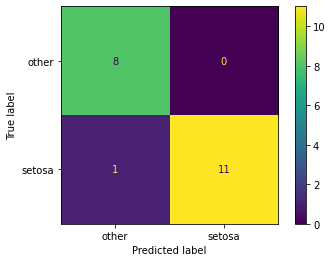

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

There is a built-in function in scikit-learn to generate classification report that provides some of the most important measures. 

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=labels))

              precision    recall  f1-score   support

       other       0.89      1.00      0.94         8
      setosa       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



The upper part of the report gives the prevision, recall and f1 score of each class along with the number of instances (support). 

The lower part gives the overall accuracy and averages of the other metrics across class. It may look a bit confusing but accuracy is the single score that is in the same column as the f1 score.

## <br><span style="color:teal"> Acces the model

In [21]:
# Get the number of nodes, counting both decision and leaf nodes
model['tree'].tree_.node_count

9

In [22]:
# Get the feature used to split a node. For leaf node, it will return -2. For decision, it will return the index of the feature
model['tree'].tree_.feature

array([ 3, -2,  3,  2,  0, -2, -2, -2, -2], dtype=int64)

In [24]:
# Get the split point, or threshold, used to split a node. For leaf node, it will return -2.
model['tree'].tree_.threshold

array([ 0.75      , -2.        ,  1.55000001,  3.95000005,  5.54999995,
       -2.        , -2.        , -2.        , -2.        ])

In [25]:
# You can create a list of decision node with feature name and the corresponding threshold
decision_node = []
for i in range(model['tree'].tree_.node_count):
    ind = model['tree'].tree_.feature[i]
    if ind >= 0:
        decision_node.append((feature_names[ind], model['tree'].tree_.threshold[i]))
    
print(decision_node)

[('petal_width', 0.75), ('petal_width', 1.550000011920929), ('petal_length', 3.950000047683716), ('sepal_length', 5.549999952316284)]


## <br><span style="color:teal"> Visualize fitted decision tree

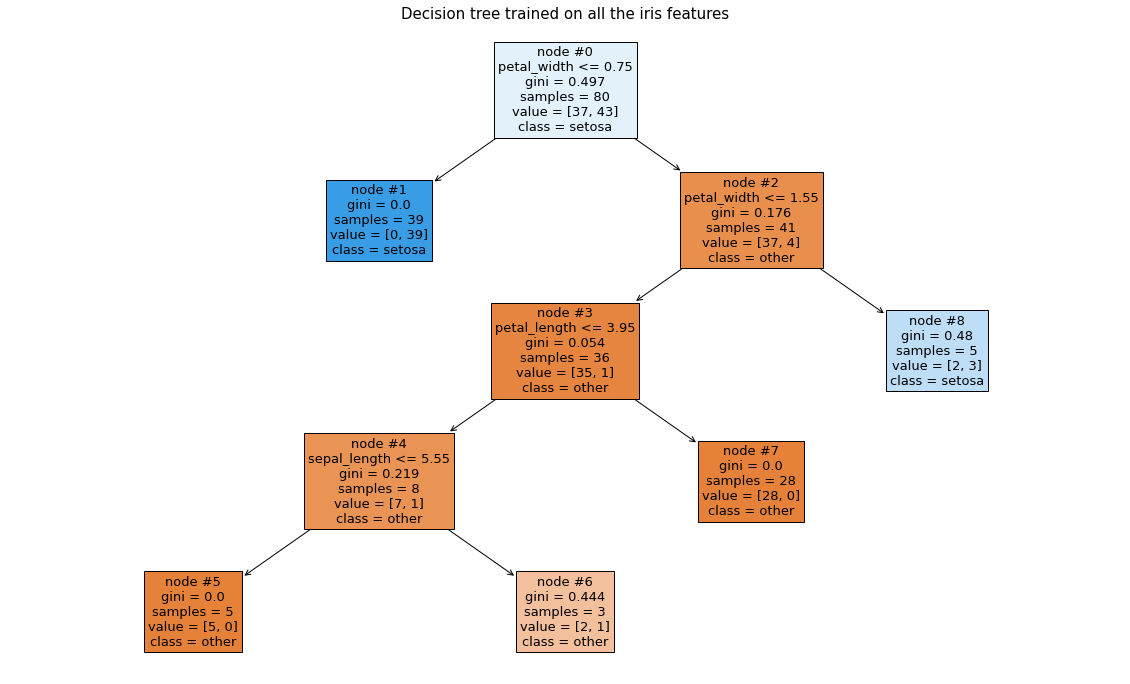

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(model['tree'], feature_names=feature_names, class_names=labels, filled=True, fontsize=13, node_ids=True)
plt.title("Decision tree trained on all the iris features", fontsize=15)
plt.show()

Information included in the decision tree:
- node ID
- feature name along with split point (for decision node)
- Gini Index (Note: this is not the weighted Gini score used to determine the split. This is the Gini Index before a split.)
- total number of samples
- number of samples for each class
- the majority class

The color of each node corresponds to the majority class in the set at that node.

### <br><span style="color:blue"> Question

Looking at the branch starting from node #2, do you notice something odd? 

## <br><span style="color:teal"> Prune decision tree

After learning the decision tree, we can use pruning to improve performance.

The complexity of a decision tree is defined as the number of splits in the tree. Simpler trees are preferred as they are easier to understand less likely to overfit your data.

The simplest method is to 
- iterate through each leaf node
- evaluate the effect of removing the split using a test set
- remove the node if that improves, i.e. lowers, the cost function on the test set

# <br><br><span style="color:rebeccapurple">Disadvantages of decision tree</span>

Some major disadvantages of the decision tree model:

1. Over-complex tree. Pruning and tunning hyperameters like minimum number of samples or maximum depth can help alleviate this problem.

2. No guarantee for trained decision tree to be globally optimal. Ensemble methods can help mitigate this impact.

3. Sensitivity to small variations in data. This may result in a completely different tree beign generated. Ensemble methods can also help improve performances.

4. Tendency to be biased if some classes dominate.

# <br><span style="color:purple"> Additional materials

### <br><span style="color:blue"> Prune decision tree
    
It is important to note that in training your decision tree using the DecisionTreeClassifier() module, there is a parameter named ccp_alpha. 
    
The nodes with the smallest values of ccp_alpha are pruned first as they are considered to have the weakest link. It is defaulted to 0, meaning that no pruning is done. As the value of ccp_alpha increases, more nodes are removed and, as a result, the total impurity of the remaining leaf nodes increases. 
    
scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and shows how the total impurity of leaves changes as this parameter varies. This is very useful as we can get an idea of what values of ccp_alpha could be appropriate for pruning.
    
   
Note: It is a bit tricky using this method in a pipeline as it can not be called inside the entire preprocessor+model pipeline. 
    
For demonstrating purpose, I'll use a dataset that doesn't require any preprocessing. Suppose we want to predict the type of fish based on physical attributes of the fish.

In [5]:
## If you're running on Google Colab, you should uncomment the line below.
# df = pd.read_csv('https://raw.githubusercontent.com/ja-nguyen/rcs-sklearn_workshop/main/datasets/Fish_classify.csv')

## If you're running on Google Colab, you should comment out the line below.
df = pd.read_csv('datasets/Fish_classify.csv')

df.head()

,species,vertical_len,diag_len,cross_len,height,width,weight
0,Other,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Other,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Other,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Other,26.5,29.0,34.0,12.4440,5.1340,430.0
4,Other,26.8,29.7,34.7,13.6024,4.9274,450.0


### <br><span style="color:blue"> Practice

In [56]:
# Get the feature columns for easier access
feature_names = df.columns.values[1:]
# Split the dataset into predictors and response
X = df[feature_names]
Y = df['species']

# Transform the target into numerical values, 
# split into train/test set and 
# fit a DecisionTreeClassfier to the train data (no need to specify min_sample_leaf)
from sklearn.preprocessing import LabelEncoder

### Your code

model = DecisionTreeClassifier(criterion='gini')

Use the cost_complexity_pruning_path() method to get the effective ccp_alphas and impurities 

In [57]:
path = model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Note: this method will recursively compute the ccp_alpha until there is only 1 node in the tree, i.e., no splitting of data at all. Therefore, it makes sense to omit the last entry from the obtained results.

In [58]:
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

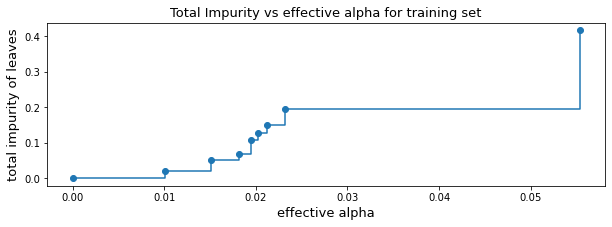

In [59]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=13)
ax.set_ylabel("total impurity of leaves", fontsize=13)
ax.set_title("Total Impurity vs effective alpha for training set", fontsize=13)

In [60]:
# Retrain using different effective alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

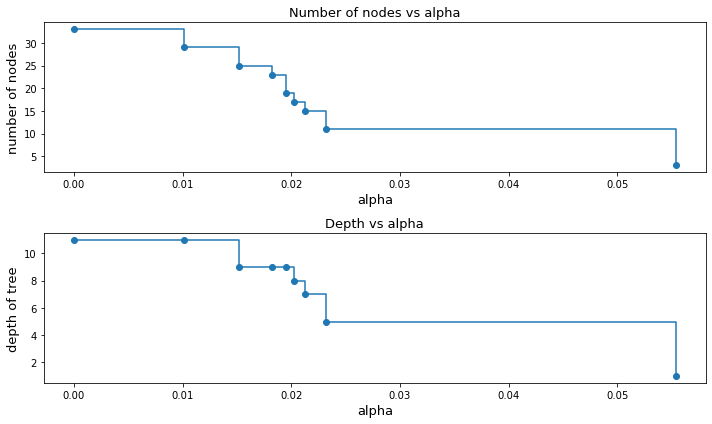

In [61]:
# We can also see how the number of nodes and depth of tree change

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10,6))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=13)
ax[0].set_ylabel("number of nodes", fontsize=13)
ax[0].set_title("Number of nodes vs alpha", fontsize=13)
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=13)
ax[1].set_ylabel("depth of tree", fontsize=13)
ax[1].set_title("Depth vs alpha", fontsize=13)
fig.tight_layout()

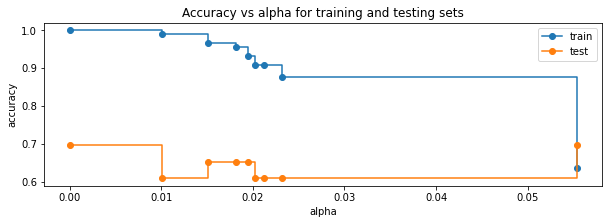

In [62]:
# We can compute the average accuracy on the train and test set

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

When ccp_alpha is set to zero, the tree overfits, leading to a 100% training accuracy and 70% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha to around 0.015 would give the optimal capacity. (Why?)

We can also obtain the list of node features and split points and see which nodes get removed as we iterate through the values of ccp_alpha.

In [63]:
decision_node = []
for clf in clfs:
    clf_node = []
    for i in range(clf.tree_.node_count):
        ind = clf.tree_.feature[i]
        if ind >= 0:
            clf_node.append((feature_names[ind], clf.tree_.threshold[i]))
    decision_node.append(clf_node)